<a href="https://colab.research.google.com/github/iamsoyeon/AI_platform/blob/main/Plantdisease_transferlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/spMohanty/PlantVillage-Dataset.git

Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 163229, done.
remote: Total 163229 (delta 0), reused 0 (delta 0), pack-reused 163229
Receiving objects: 100% (163229/163229), 2.00 GiB | 9.34 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Updating files: 100% (182401/182401), done.


In [ ]:
%cd PlantVillage-Dataset

/content/PlantVillage-Dataset


In [ ]:
%cd data_distribution_for_SVM

/content/PlantVillage-Dataset/data_distribution_for_SVM


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import os
import glob
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir ="./train/"
test_dir="./test/"

In [ ]:
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [ ]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir) 
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

38 Classes
8751 Train images
10547 Test images


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2,
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32
train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)

Found 8751 images belonging to 38 classes.
Found 10547 images belonging to 38 classes.


In [ ]:
'''
from keras.applications import ResNet50
from keras.optimizers import Adam
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in resnet.layers[:-4]:
    layer.trainable = False

def nvidia_model():
  model = Sequential()
  model.add(resnet)

  model.add(Dropout(0.8))
  
  model.add(Flatten())
  
  model.add(Dense(512, activation='elu'))
  model.add(Dropout(0.8))
  
  model.add(Dense(128, activation='elu'))
  model.add(Dropout(0.8))
  
  model.add(Dense(64, activation='elu'))
  model.add(Dropout(0.8))
  
  model.add(Dense(38))
  
  optimizer = Adam(lr=0.0000001)
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

model = nvidia_model()
print(model.summary())  '''

"\nfrom keras.applications import ResNet50\nfrom keras.optimizers import Adam\nresnet = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))\n\nfor layer in resnet.layers[:-4]:\n    layer.trainable = False\n\ndef nvidia_model():\n  model = Sequential()\n  model.add(resnet)\n\n  model.add(Dropout(0.8))\n  \n  model.add(Flatten())\n  \n  model.add(Dense(512, activation='elu'))\n  model.add(Dropout(0.8))\n  \n  model.add(Dense(128, activation='elu'))\n  model.add(Dropout(0.8))\n  \n  model.add(Dense(64, activation='elu'))\n  model.add(Dropout(0.8))\n  \n  model.add(Dense(38))\n  \n  optimizer = Adam(lr=0.0000001)\n  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])\n  return model\n\nmodel = nvidia_model()\nprint(model.summary())  "

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((3, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(38, activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 84, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 41, 41, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 64)       0

In [ ]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2']


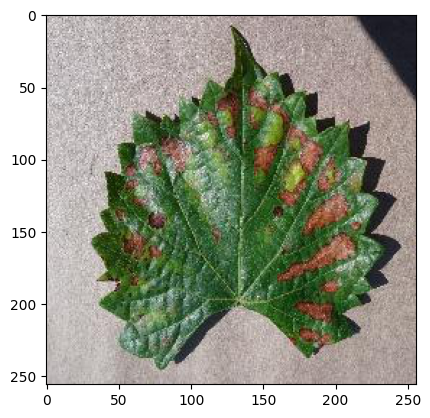

In [ ]:
#from keras.preprocessing import image
import numpy as np

import keras.utils as image
img1 = image.load_img('./train/12/049c8615-7d94-4a4b-8467-fe20c0cecac1.JPG')
plt.imshow(img1);
img1 = image.load_img('./test/13/00d8329b-6621-4e08-8ec5-cf702eb3b205.JPG', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [ ]:
from tensorflow.keras.models import Model
conv2d_3_output = Model(inputs=model.input, outputs=model.get_layer('conv2d').output)
max_pooling2d_3_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d').output)
conv2d_4_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_1').output)
max_pooling2d_4_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)
conv2d_5_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
max_pooling2d_5_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)
flatten_1_output = Model(inputs=model.input,outputs=model.get_layer('flatten').output)
conv2d_3_features = conv2d_3_output.predict(img)
max_pooling2d_3_features = max_pooling2d_3_output.predict(img)
conv2d_4_features = conv2d_4_output.predict(img)
max_pooling2d_4_features = max_pooling2d_4_output.predict(img)
conv2d_5_features = conv2d_5_output.predict(img)
max_pooling2d_5_features = max_pooling2d_5_output.predict(img)
flatten_1_features = flatten_1_output.predict(img)

1/1 [==============================] - 0s 118ms/step


1/1 [==============================] - 0s 154ms/step


1/1 [==============================] - 0s 88ms/step


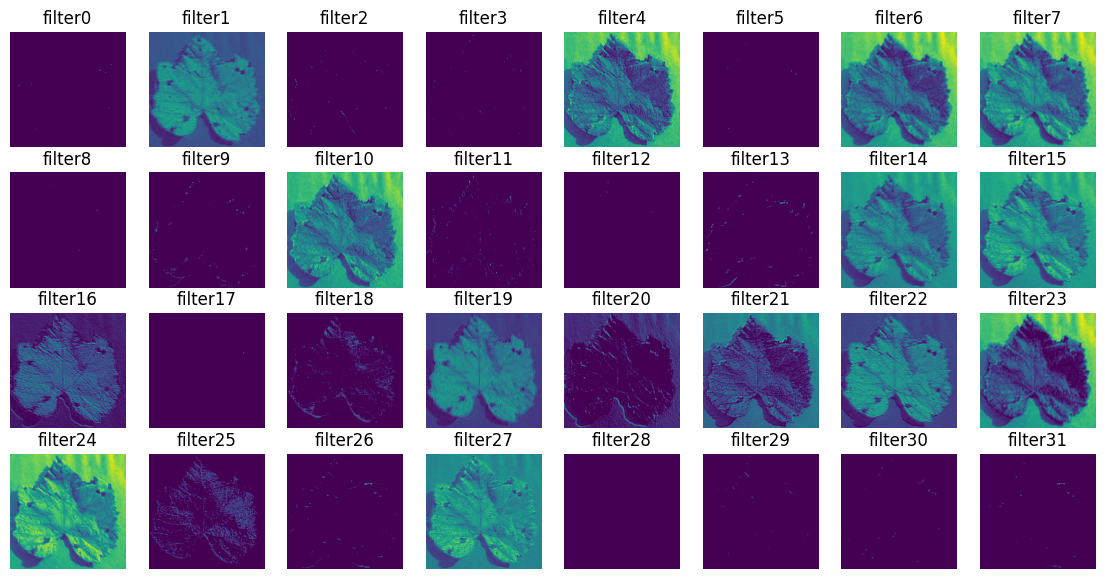

In [ ]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_3_features[0, :, :, i], cmap='viridis')
plt.show()

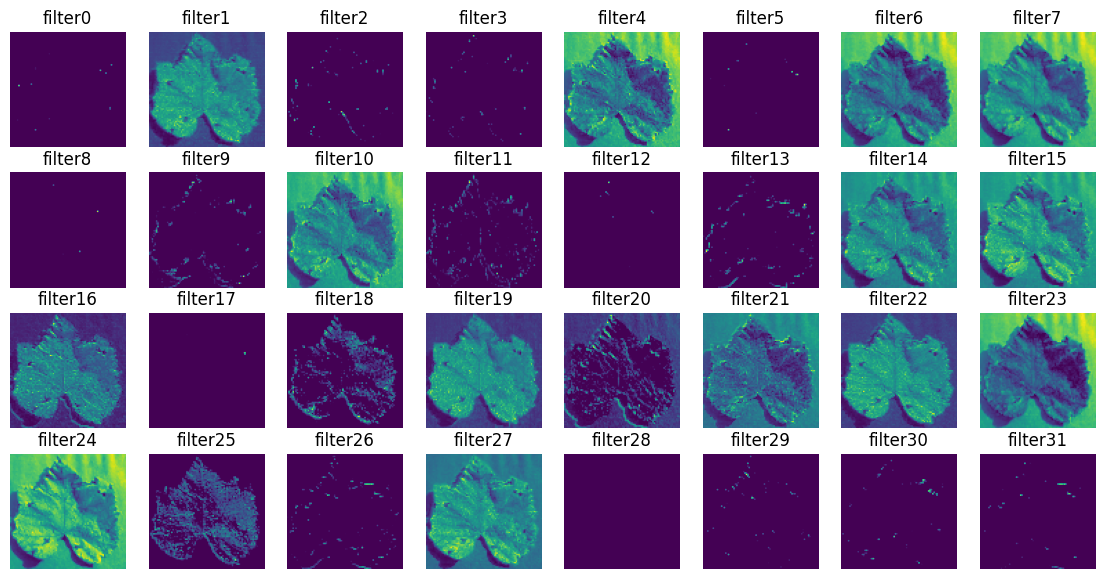

In [ ]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_3_features[0, :, :, i], cmap='viridis')
plt.show()

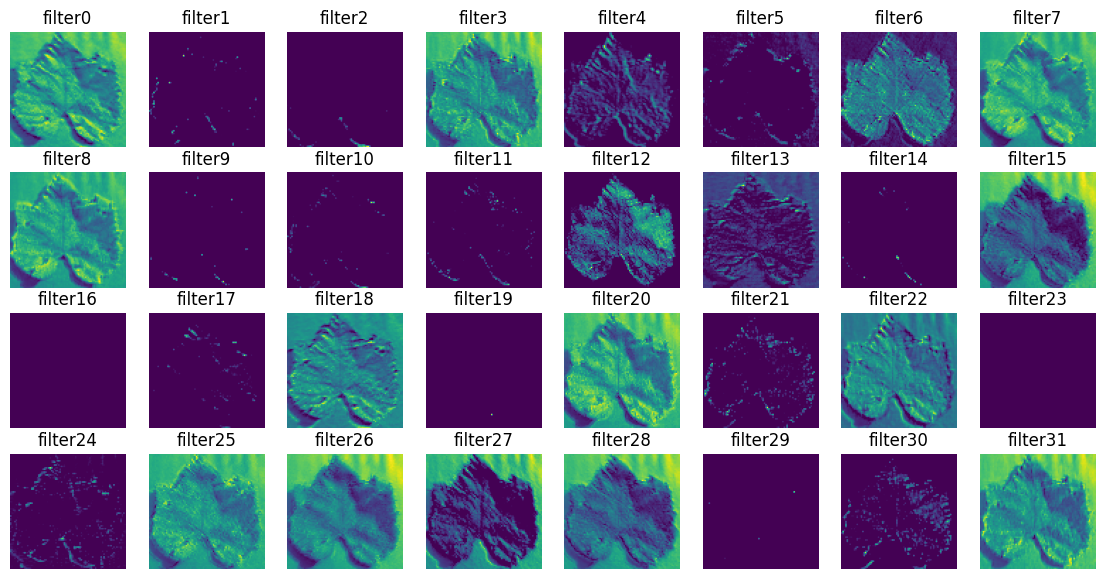

In [ ]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_4_features[0, :, :, i], cmap='viridis')
plt.show()

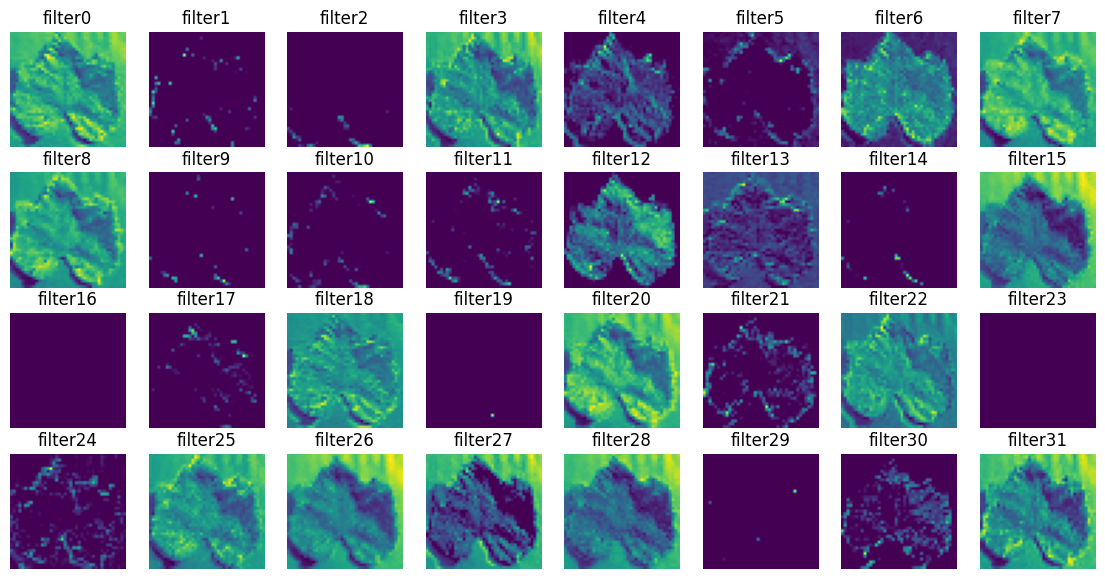

In [ ]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_4_features[0, :, :, i], cmap='viridis')
plt.show()

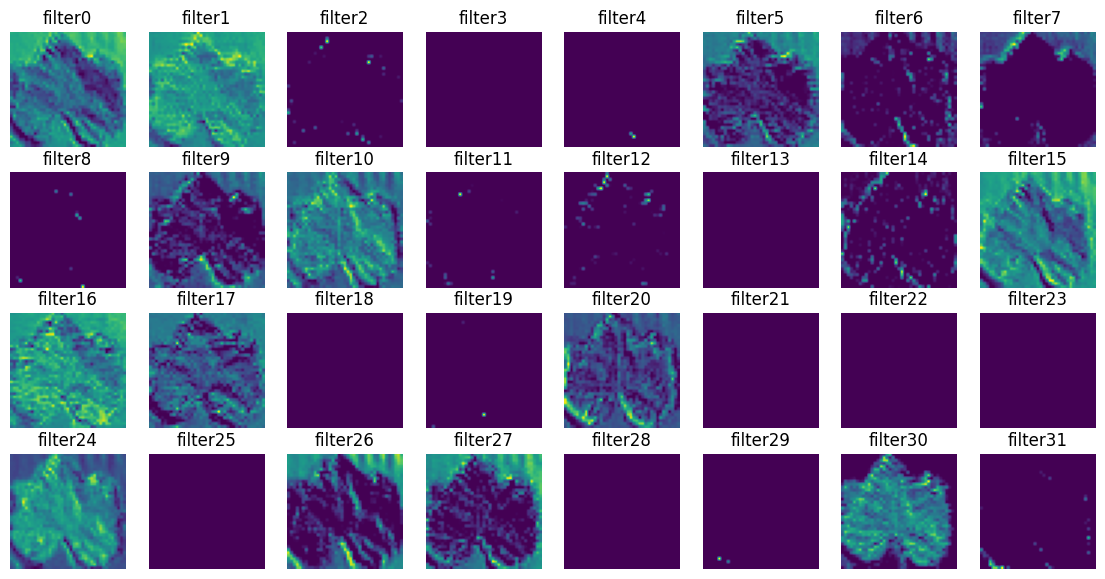

In [ ]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_5_features[0, :, :, i], cmap='viridis')
plt.show()

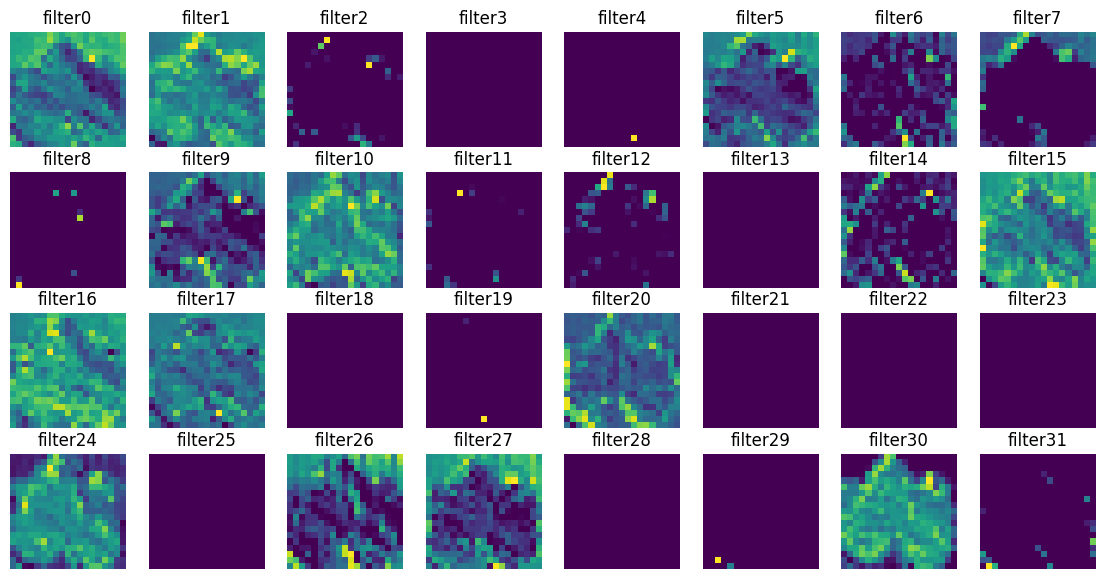

In [ ]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_5_features[0, :, :, i], cmap='viridis')
plt.show()

In [ ]:
validation_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(img_height, img_width),
    batch_size=batch_size)

Found 8751 images belonging to 38 classes.


In [ ]:
#opt=keras.optimizers.Adam(lr=0.001)
from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

#model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
train=model.fit_generator(train_generator,
                          epochs=30,
                          steps_per_epoch=train_generator.samples // batch_size,
                          validation_data=validation_generator,
                          )#val_samples= validation_generator.samples// batch_size,verbose=1)

Epoch 1/30
273/273 [==============================] - 289s 1s/step - loss: 0.1054 - accuracy: 0.2847 - val_loss: 0.0685 - val_accuracy: 0.5169
Epoch 2/30
273/273 [==============================] - 274s 1s/step - loss: 0.0654 - accuracy: 0.5267 - val_loss: 0.0500 - val_accuracy: 0.6302
Epoch 3/30
273/273 [==============================] - 274s 1s/step - loss: 0.0518 - accuracy: 0.6275 - val_loss: 0.0403 - val_accuracy: 0.7092
Epoch 4/30
273/273 [==============================] - 259s 951ms/step - loss: 0.0438 - accuracy: 0.6873 - val_loss: 0.0327 - val_accuracy: 0.7813
Epoch 5/30
273/273 [==============================] - 267s 979ms/step - loss: 0.0378 - accuracy: 0.7377 - val_loss: 0.0262 - val_accuracy: 0.8205
Epoch 6/30
273/273 [==============================] - 277s 1s/step - loss: 0.0335 - accuracy: 0.7680 - val_loss: 0.0245 - val_accuracy: 0.8442
Epoch 7/30
273/273 [==============================] - 271s 994ms/step - loss: 0.0303 - accuracy: 0.7901 - val_loss: 0.0202 - val_accurac

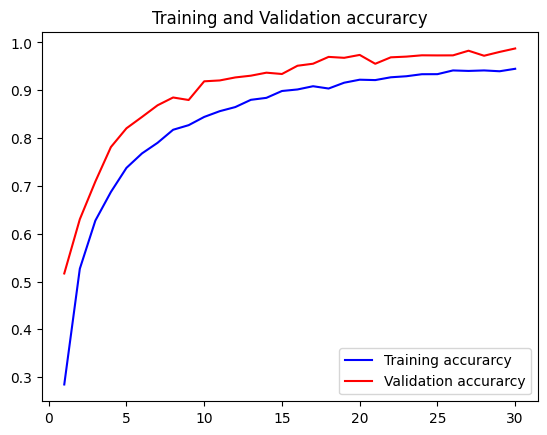

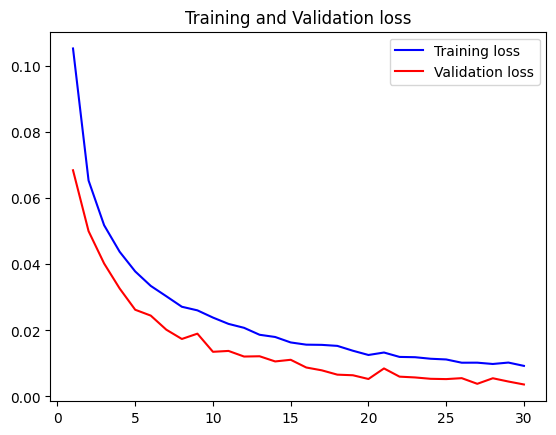

In [ ]:
acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()